In [44]:
import sys
import time
import traceback
import os
from arduino_iot_cloud import ArduinoCloudClient
import csv 
import time
import plotly.io as pio
import plotly.express as px
import pandas as pd
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt

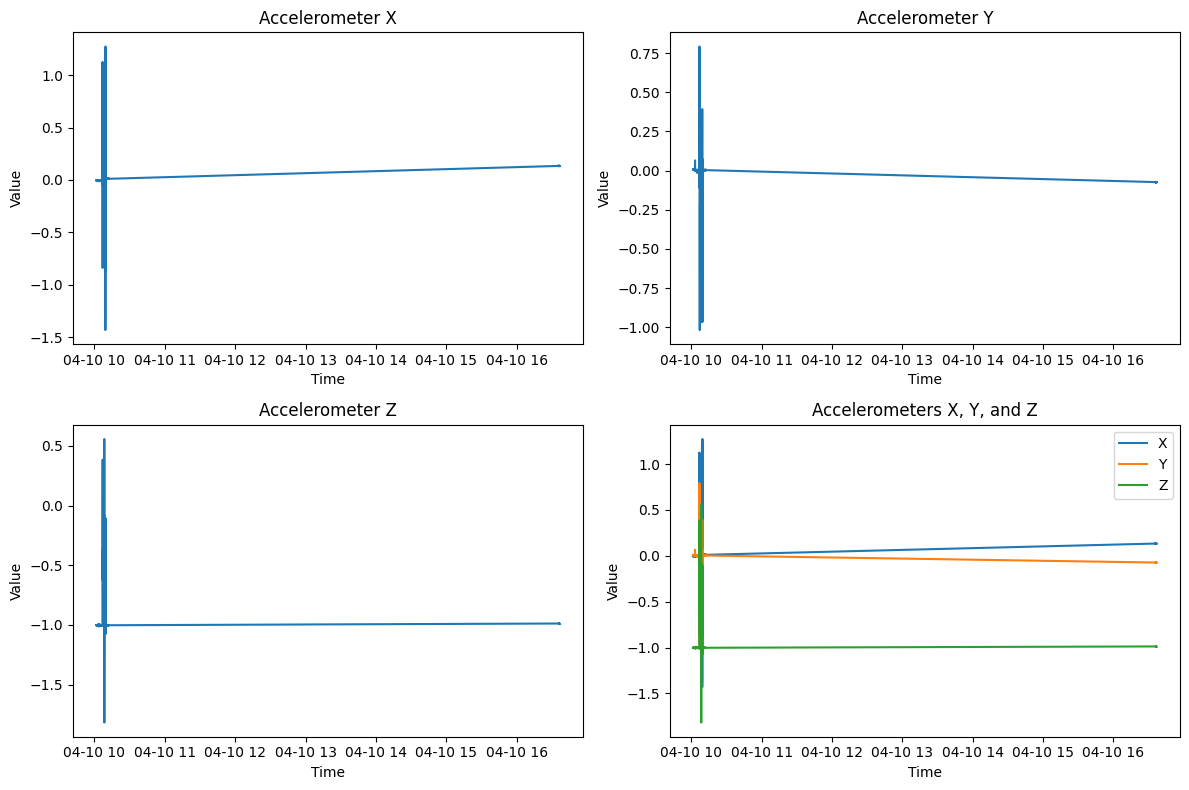

In [45]:
# Load the data with appropriate column names
accelerometer_x = pd.read_csv('acc_x.csv', names=['time', 'value'])
accelerometer_y = pd.read_csv('acc_y.csv', names=['time', 'value'])
accelerometer_z = pd.read_csv('acc_z.csv', names=['time', 'value'])

# Convert the 'time' column to datetime
accelerometer_x['time'] = pd.to_datetime(accelerometer_x['time'])
accelerometer_y['time'] = pd.to_datetime(accelerometer_y['time'])
accelerometer_z['time'] = pd.to_datetime(accelerometer_z['time'])

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot accelerometer_x
plt.subplot(2, 2, 1)
plt.plot(accelerometer_x['time'], accelerometer_x['value'])
plt.title('Accelerometer X')

# Plot accelerometer_y
plt.subplot(2, 2, 2)
plt.plot(accelerometer_y['time'], accelerometer_y['value'])
plt.title('Accelerometer Y')

# Plot accelerometer_z
plt.subplot(2, 2, 3)
plt.plot(accelerometer_z['time'], accelerometer_z['value'])
plt.title('Accelerometer Z')

# Plot all accelerometers together
plt.subplot(2, 2, 4)
plt.plot(accelerometer_x['time'], accelerometer_x['value'], label='X')
plt.plot(accelerometer_y['time'], accelerometer_y['value'], label='Y')
plt.plot(accelerometer_z['time'], accelerometer_z['value'], label='Z')
plt.legend()
plt.title('Accelerometers X, Y, and Z')

# Add axis labels
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [46]:
### Receiving the data from Python

In [47]:

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='live-update-graph'),
    dcc.Interval(id='interval-component', interval=1000, n_intervals=0)  # Update every second  
])

@app.callback(
    Output('live-update-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)

def update_graph(n_intervals):
    global cur_data
    # Convert to DataFrame for Plotly
    df = pd.DataFrame(cur_data, columns=['index','Timestamp', 'X', 'Y', 'Z'])
    fig = px.line(df, x= 'Timestamp', y = ['X','Y','Z'])  # Scatter plot

    return fig

In [1]:
from arduino_iot_cloud import ArduinoCloudClient
import time

DEVICE_ID = "538f431b-2be4-41e7-ab11-746e78182e57"
SECRET_KEY = "S3hVkNsx8yx?Rq@2vhS3gYbQR"

# Callback for debugging data received
def on_data_received(client, variable, value):
    print(f"Data received - Variable: {variable}, Value: {value}")

def connect_to_cloud():
    try:
        # Connect to Arduino IoT Cloud
        client = ArduinoCloudClient(
            device_id=DEVICE_ID,
            username=DEVICE_ID,
            password=SECRET_KEY,
            sync_mode=True
        )

        # Register variables with callback
        client.register("x", value=None, on_write=lambda client, value: on_data_received(client, "x", value))
        client.register("y", value=None, on_write=lambda client, value: on_data_received(client, "y", value))
        client.register("z", value=None, on_write=lambda client, value: on_data_received(client, "z", value))

        client.start()
        print("Successfully connected to Arduino IoT Cloud.")

        # Keep the connection alive
        time.sleep(60)

    except Exception as e:
        print(f"Connection failed: {e}")

if __name__ == "__main__":
    connect_to_cloud()


Successfully connected to Arduino IoT Cloud.


In [48]:
from dash import Dash, dcc, html
import pandas as pd
import plotly.express as px

# Create the Dash application instance
app = Dash(__name__)

# Read the CSV data
data = pd.read_csv('combined_accelerometer_data.csv')  # Make sure your file is named correctly

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Calculate the magnitude of the accelerometer data
data['magnitude'] = (data['value_x']**2 + data['value_y']**2 + data['value_z']**2) ** 0.5

# Create a line plot of the accelerometer data
fig = px.line(data, x='time', y=['value_x', 'value_y', 'value_z', 'magnitude'],
              title="Accelerometer Data - X, Y, Z and Magnitude")

# Layout for the Dash app
app.layout = html.Div([
    html.H1("Accelerometer Data Dashboard"),
    html.P("This is a Dash app displaying accelerometer data from a CSV."),
    dcc.Graph(figure=fig)  # Display the graph
])

# Run the server
if __name__ == "__main__":
    app.run(debug=True)


In [49]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("combined_accelerometer_data.csv")

# Print the column names to inspect
print("Columns in the CSV file:", df.columns)

# Strip extra spaces from column names (if any)
df.columns = df.columns.str.strip()

# Print the first few rows to inspect the data structure
print(df.head())

# Check if 'Timestamp' exists, if not, replace with the correct column name
if 'Timestamp' in df.columns:
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df.set_index("Timestamp", inplace=True)
else:
    print("Timestamp column not found. Please check your data.")
    # Handle the case where Timestamp is missing or is named differently

# Example: Inspect the data after setting the index
print(df.head())

# If you need to drop unwanted columns, you can use:
# df.drop(columns=["UnwantedColumnName"], inplace=True)


Columns in the CSV file: Index(['time', 'value_x', 'value_y', 'value_z'], dtype='object')
                  time   value_x   value_y   value_z
0  2025-05-02 01:49:19 -0.006348  0.021469 -1.000977
1  2025-05-02 01:49:21 -0.006134  0.022003 -1.000824
2  2025-05-02 01:49:24 -0.005829  0.021515 -1.002029
3  2025-05-02 01:49:26 -0.007462  0.022232 -1.001846
4  2025-05-02 01:49:28 -0.006882  0.022232 -1.002625
Timestamp column not found. Please check your data.
                  time   value_x   value_y   value_z
0  2025-05-02 01:49:19 -0.006348  0.021469 -1.000977
1  2025-05-02 01:49:21 -0.006134  0.022003 -1.000824
2  2025-05-02 01:49:24 -0.005829  0.021515 -1.002029
3  2025-05-02 01:49:26 -0.007462  0.022232 -1.001846
4  2025-05-02 01:49:28 -0.006882  0.022232 -1.002625


In [50]:
import pandas as pd

# Load the CSV
df = pd.read_csv("combined_accelerometer_data.csv")

# Convert 'time' column to datetime and set it as the index
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

# Now extract the five activity segments by time of day
act_1 = df.between_time("01:15:40", "01:16:30")
act_2 = df.between_time("01:16:50", "01:18:30")
act_3 = df.between_time("01:21:10", "01:22:40")
act_4 = df.between_time("01:24:45", "01:25:15")
act_5 = df.between_time("01:30:00", "01:30:40")

# (Optional) Inspect the segments
print("act_1:\n", act_1.head(), "\n")
print("act_2:\n", act_2.head(), "\n")
print("act_3:\n", act_3.head(), "\n")
print("act_4:\n", act_4.head(), "\n")
print("act_5:\n", act_5.head(), "\n")


act_1:
 Empty DataFrame
Columns: [value_x, value_y, value_z]
Index: [] 

act_2:
 Empty DataFrame
Columns: [value_x, value_y, value_z]
Index: [] 

act_3:
 Empty DataFrame
Columns: [value_x, value_y, value_z]
Index: [] 

act_4:
 Empty DataFrame
Columns: [value_x, value_y, value_z]
Index: [] 

act_5:
 Empty DataFrame
Columns: [value_x, value_y, value_z]
Index: [] 



In [22]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   value_x  0 non-null      float64
 1   value_y  0 non-null      float64
 2   value_z  0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


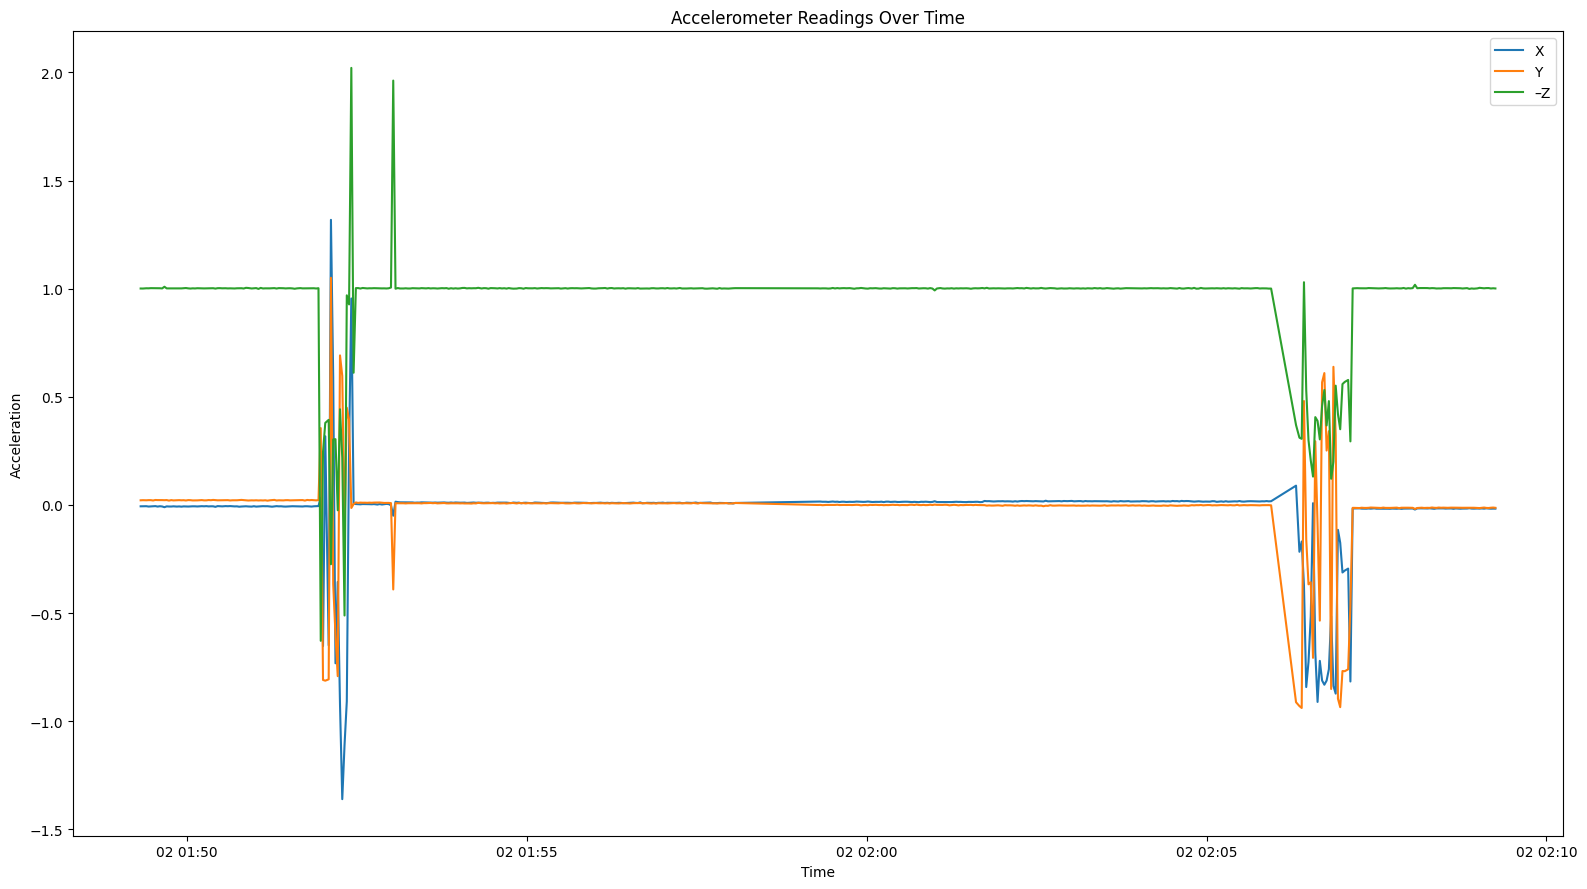

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and index the data
df = pd.read_csv("combined_accelerometer_data.csv")
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

# Plot X, Y, and inverted Z
plt.figure(figsize=(16, 9))
sns.lineplot(x=df.index, y=df["value_x"], label="X")
sns.lineplot(x=df.index, y=df["value_y"], label="Y")
sns.lineplot(x=df.index, y=-df["value_z"], label="–Z")

# Formatting
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.title("Accelerometer Readings Over Time")
plt.legend()
plt.tight_layout()
plt.show()


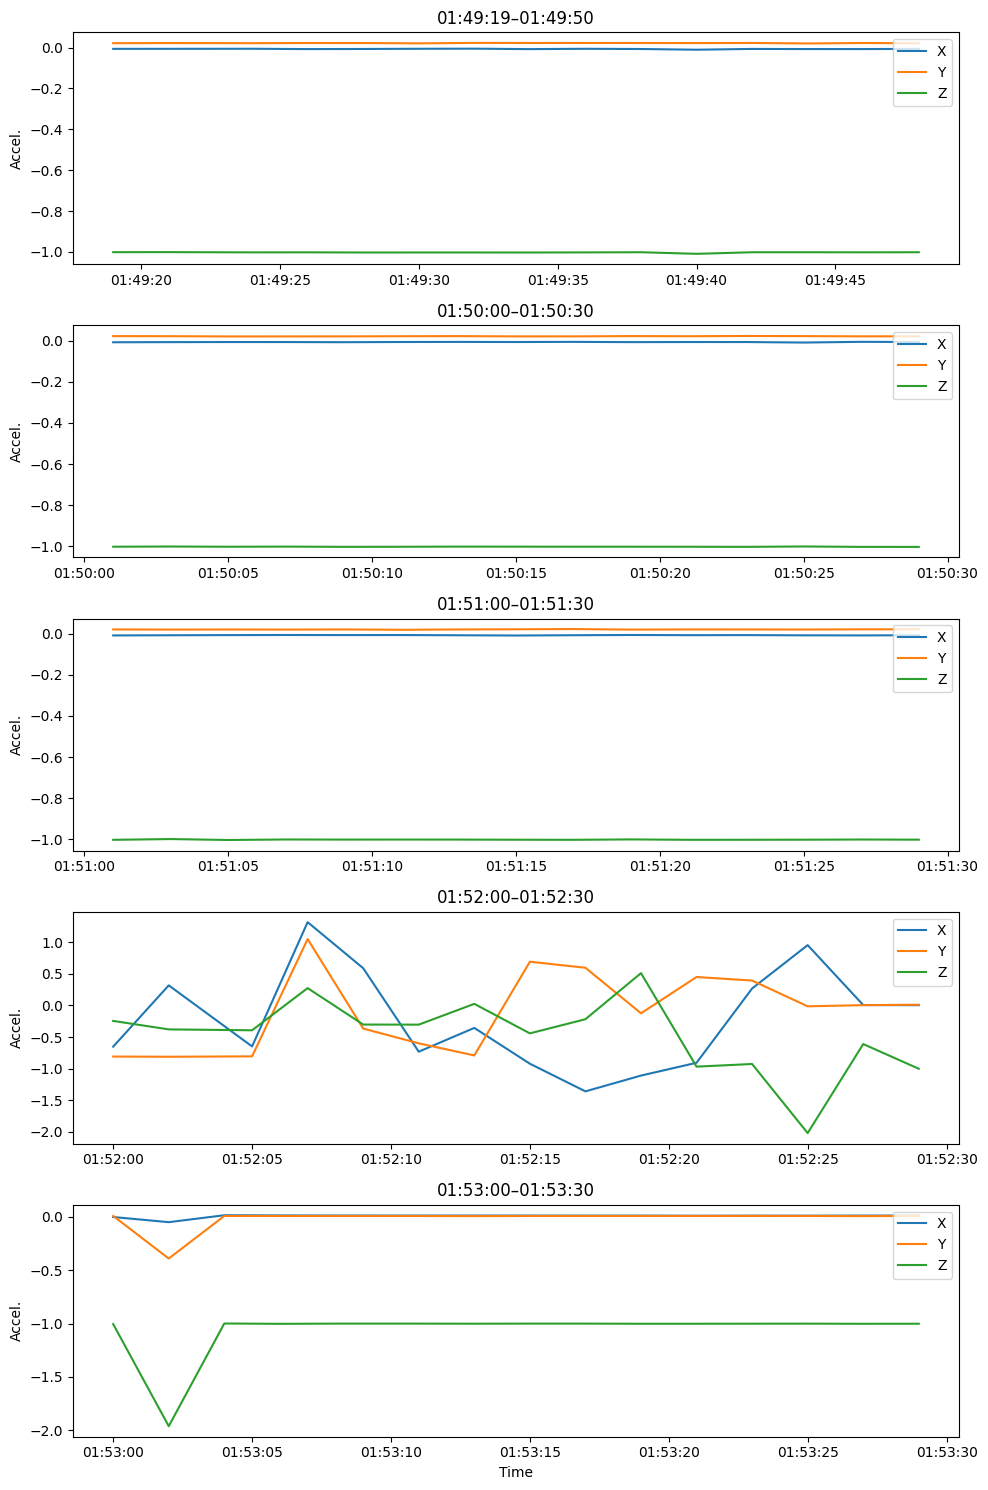

In [52]:
import matplotlib.pyplot as plt

# Define five 30-second windows within your real data range
windows = [
    ("01:49:19", "01:49:50"),
    ("01:50:00", "01:50:30"),
    ("01:51:00", "01:51:30"),
    ("01:52:00", "01:52:30"),
    ("01:53:00", "01:53:30"),
]

# Extract non-empty segments
segments = []
for start, end in windows:
    seg = df.between_time(start, end)
    if not seg.empty:
        segments.append((f"{start}–{end}", seg))

if not segments:
    raise ValueError("None of your new windows contain data—check the printed data range again!")

# Plot each segment
fig, axes = plt.subplots(len(segments), 1, figsize=(10, 3 * len(segments)), sharex=False)
for ax, (label, seg) in zip(axes, segments):
    ax.plot(seg.index, seg["value_x"], label="X")
    ax.plot(seg.index, seg["value_y"], label="Y")
    ax.plot(seg.index, seg["value_z"], label="Z")
    ax.set_title(label)
    ax.set_ylabel("Accel.")
    ax.legend(loc="upper right")

plt.xlabel("Time")
plt.tight_layout()
plt.show()


In [54]:
# Check the actual time range of your data
print("Data starts at:", df.index.min())
print("Data ends   at:", df.index.max())

# Define a valid time range for act_1 based on your data
act_1 = df.between_time("01:49:19", "01:49:50")

# Verify if act_1 contains data
if act_1.empty:
    print("No data found in the specified time range.")
else:
    print("Summary statistics for act_1:")
    print(act_1.describe())


Data starts at: 2025-05-02 01:49:19
Data ends   at: 2025-05-02 02:09:15
Summary statistics for act_1:
         value_x    value_y    value_z
count  15.000000  15.000000  15.000000
mean   -0.006854   0.021881  -1.002310
std     0.001201   0.000793   0.001971
min    -0.010468   0.020111  -1.009109
25%    -0.007317   0.021492  -1.002510
50%    -0.006653   0.022232  -1.001846
75%    -0.006058   0.022392  -1.001427
max    -0.005432   0.022919  -1.000824


In [55]:
# Check the time range of the dataset
print("Data starts at:", df.index.min())
print("Data ends   at:", df.index.max())

# Define a valid time range for act_2
act_2 = df.between_time("01:49:51", "01:50:30")

# Check and describe act_2
if act_2.empty:
    print("No data found in the specified time range for act_2.")
else:
    print("Summary statistics for act_2:")
    print(act_2.describe())


Data starts at: 2025-05-02 01:49:19
Data ends   at: 2025-05-02 02:09:15
Summary statistics for act_2:
         value_x    value_y    value_z
count  20.000000  20.000000  20.000000
mean   -0.006676   0.021769  -1.001708
std     0.000816   0.000654   0.000678
min    -0.008759   0.020645  -1.003174
25%    -0.007053   0.021194  -1.002186
50%    -0.006523   0.021820  -1.001694
75%    -0.006245   0.022236  -1.001297
max    -0.005371   0.023193  -1.000534
